In [1]:
# Keras uses Glorot initialization to avoid gradient vanishing, to change it to he_normal initialization use kernel_initializer
import tensorflow as tf

dense = tf.keras.layers.Dense(50, activation="relu",
                              kernel_initializer="he_normal")

In [2]:
# Or use VarianceScaling initializer if you want he_normal initialization
he_avg_init = tf.keras.initializers.VarianceScaling(scale=2., mode="fan_avg", distribution="uniform")

dense = tf.keras.layers.Dense(50, activation="sigmoid", kernel_initializer=he_avg_init)

In [3]:
# Leaky ReLU
leaky_relu = tf.keras.layers.LeakyReLU(negative_slope=0.2) # negative_slope changes the negative slope (the more the more)
dense = tf.keras.layers.Dense(50, activation=leaky_relu, kernel_initializer="he_normal")

In [4]:
# ELU activation function
elu = tf.keras.layers.ELU(alpha=0.3) # alpha = slope of negative section
dense_elu = tf.keras.layers.Dense(50, activation=elu, kernel_initializer="he_normal") # or activation="elu"

In [5]:
# SELU activation function
dense_elu = tf.keras.layers.Dense(50, activation="selu", kernel_initializer="he_normal")

In [6]:
# GELU, Swish, and Mish
dense_elu = tf.keras.layers.Dense(50, activation="gelu", kernel_initializer="he_normal")
dense_elu = tf.keras.layers.Dense(50, activation="swish", kernel_initializer="he_normal")
dense_elu = tf.keras.layers.Dense(50, activation="mish", kernel_initializer="he_normal")

# Batch normalization

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

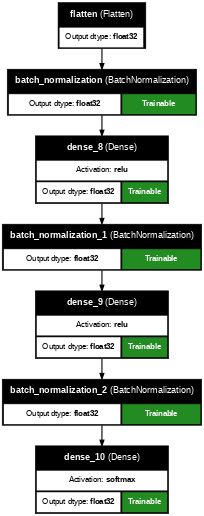

In [9]:
tf.keras.utils.plot_model(model, show_dtype=True, show_layer_names=True, show_layer_activations=True, dpi=40, show_trainable=True)

In [10]:
# The last two parameters of BN layer are non-trainable (non-trainable = untouched by backpropagation)
[(var.name, var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [11]:
# Batch normalization but now before activation function and after first Dense layer
model = tf.keras.Sequential([
    tf.keras.layers.Input((28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False), # use_bias=False because BN includes one parameter per input
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 300)            │       235,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        30,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267,810 (1.02 MB)

 Trainable params: 267,010 (1.02 MB)

 Non-trainable params: 800 (3.12 KB)

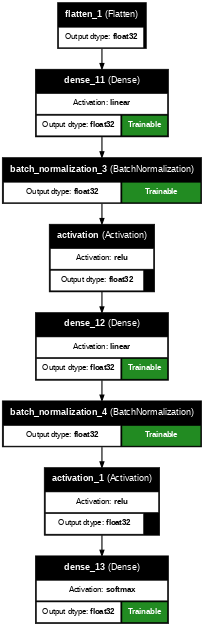

In [13]:
tf.keras.utils.plot_model(model, show_dtype=True, show_layer_names=True, show_layer_activations=True, dpi=40, show_trainable=True)

In [14]:
# Gradient clipping (cut the gradient, so that it doesn't exceed specific threshold)
optimizer = tf.keras.optimizers.SGD(clipvalue=1.0)

# Transfer Learning
Code examples are not executable!

In [15]:
# Using layers from previous NNs to train new ones
model_A = tf.keras.models.load_model("my_model_A") # Example
model_B_on_A = tf.keras.Sequential(model_A.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1, activation="sigmoid"))
# In this context model A will change if model B as well
# To avoid it clone model A before sharing the layers
model_A_clone = tf.keras.models.clone_model(model_A) # clone_model() clones only architecture, not the weights!
model_A_clone.set_weights(model_A.get_weights()) # use set_weights() to set weights as well

ValueError: File format not supported: filepath=my_model_A. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(my_model_A, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

In [ ]:
# Freeze shared layers from A to avoid wrecking them by backpropagation
for layer in model_B_on_A.layers[:-1]:
  layer.trainable = False

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_B_on_A.complie(loss="binary_crossentropy", optimizer=optimizer,
                     metrics=["accuracy"])

In [ ]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4, validation_data=(X_valid_B, y_valid_B)) # Train the model

for layer in model_B_on_A.layers[:-1]:
  layer.trainable = True # Now you can unfreeze the layers

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001) # better decreasing the learning rate after unfreezing
model_B_on_A.compile(loss="binary_crossentropy", optimizer=optimizer, # Always compile the model after freezing/unfreezing the layers
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

In [70]:
# Nesterov optimization (momentum)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,
                                    nesterov=True)

In [17]:
# RMSprop optimizer
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

In [18]:
import tensorflow as tf

In [19]:
# 3 variants of adam - AdaMax, Nadam, AdamW

adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,
                                beta_2=0.999)

adam_max = tf.keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9,
                                beta_2=0.999)

nadam = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, # Adam + Nesterov trick
                                beta_2=0.999)

adam_w = tf.keras.optimizers.AdamW(learning_rate=0.001, beta_1=0.9, # Adam with weight decay regularization
                                beta_2=0.999)

# Learning rate scheduling

In [20]:
# Implementing exponential scheduling
def exponential_decay_fn(epoch):
  return 0.01 * 0.1 ** (epoch / 20)

# Or

def exponential_decay(lr0, s):
  def exponential_decay_fn(epoch):
    return lr0 * 0.1 ** (epoch / s)
  return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [21]:
import numpy as np
X_train = np.random.randn(28, 28)
y_train = np.random.randn(10)

In [22]:
# Then use is as callback by fitting the model
rate_scheduler = tf.keras.callbacks.LearningRateScheduler(schedule=exponential_decay_fn)

In [23]:
# Implementing piecewise constant scheduling
def piecewise_constant_fn(epoch):
  if epoch < 5:
    return 0.01
  elif epoch < 15:
    return 0.005
  else:
    return 0.001

piecewise_scheduler = tf.keras.callbacks.LearningRateScheduler(schedule=piecewise_constant_fn)

In [24]:
# Implement ReduceLROnPlateau callback. It multiplies the learning rate by 0.5 if the best validation loss does not improve for 5 epochs
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

In [25]:
# Create your own lr scheduling with one of the optimizers.schedules classes
# Here is implementation of exponential_decay_fn() defined earlier
import math

batch_size = 32
n_epochs = 25
n_steps = n_epochs * math.ceil(len(X_train) / batch_size)
scheduled_learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.01, decay_steps=n_steps, decay_rate=0.1)
optimizer = tf.keras.optimizers.SGD(learning_rate=scheduled_learning_rate)

# L1 and L2 Regularization

In [26]:
# There's how to use regularizations

layer_l1 = tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal",
                              kernel_regularizer=tf.keras.regularizers.l1(0.01))

layer_l2 = tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal",
                              kernel_regularizer=tf.keras.regularizers.l2(0.01))

layer_l1_l2 = tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal",
                              kernel_regularizer=tf.keras.regularizers.l1_l2(0.01))

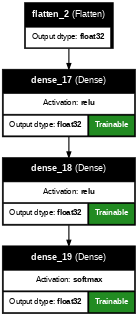

In [27]:
# If you always have the same layers, instead of writting each use partial()
from functools import partial

RegularizedDense = partial(tf.keras.layers.Dense,
                           activation="relu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=tf.keras.regularizers.l1(0.01))

model = tf.keras.Sequential([
    tf.keras.layers.Input((28, 28)),
    tf.keras.layers.Flatten(),
    RegularizedDense(100),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")

])

tf.keras.utils.plot_model(model, show_dtype=True, show_layer_names=True, show_layer_activations=True, dpi=40, show_trainable=True)

In [28]:
# Another example of partial()
print_ = partial(print)
print_("hi")
print_("merhaba")
print_("привет")
print_("hola")
print_("hallo")

hi
merhaba
привет
hola
hallo


In [29]:
# Dropout (drops some neurons *except ones in the output layer with p (probability))
Dense = partial(tf.keras.layers.Dense, activation="relu", kernel_initializer="he_normal")

model = tf.keras.Sequential([
    tf.keras.layers.Input((28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.2),
    Dense(100),
    tf.keras.layers.Dropout(rate=0.2),
    Dense(100),
    tf.keras.layers.Dropout(rate=0.2),
    Dense(10, activation="softmax", kernel_initializer="glorot_uniform")])

# Make sure to evaluate the training loss without dropout (Because dropout is active during the training and gives out not actual train loss)

In [30]:
# Monte Carlo Dropout
class MCDropout(tf.keras.layers.Dropout):
  def call(self, inputs, training=False):
    return super().call(inputs, training=True)

In [31]:
# Max-Norm regularization
dense = tf.keras.layers.Dense(
    100, activation="relu", kernel_initializer="he_normal",
    kernel_constraint=tf.keras.constraints.max_norm(1.))

# Exercises

not correct*

## 8.

### 8 (a)

In [2]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
X_train[0].shape, y_train[0]

((32, 32, 3), array([6], dtype=uint8))

In [4]:
class_names = ["airplane",	"automobile", "bird",	"cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [34]:
from functools import partial
DenseLayer = partial(tf.keras.layers.Dense, kernel_initializer="he_normal", activation="swish")


model = tf.keras.Sequential([
    tf.keras.layers.Input((32, 32, 3)),
    tf.keras.layers.Flatten(),
])

for _ in range(20):
  model.add(DenseLayer(100))
model.add(tf.keras.layers.Dense(len(class_names), activation="sigmoid", kernel_initializer="he_normal"))

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,210 (1.91 MB)

 Trainable params: 500,210 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

### 8 (b)

In [30]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.0001)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
early_stopping = tf.keras.callbacks.EarlyStopping(patience=15) # patience = number of epochs with no improvement after which training will be stopped.

model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [26]:
# Create validation set
X_val, y_val = X_train[-15_000:], y_train[-15_000:]
X_train, y_train = X_train[:-15_000], y_train[:-15_000]

In [31]:
history_1 = model.fit(X_train, y_train, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping], epochs=35)

Epoch 1/35
157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 34ms/step - accuracy: 0.1101 - loss: 20.9387 - val_accuracy: 0.1105 - val_loss: 3.3884
Epoch 2/35
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1304 - loss: 2.8801 - val_accuracy: 0.1620 - val_loss: 2.4245
Epoch 3/35
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1732 - loss: 2.3548 - val_accuracy: 0.1809 - val_loss: 2.3254
Epoch 4/35
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1928 - loss: 2.2466 - val_accuracy: 0.1859 - val_loss: 2.2297
Epoch 5/35
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2174 - loss: 2.1517 - val_accuracy: 0.2133 - val_loss: 2.1602
Epoch 6/35
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.2378 - loss: 2.1179 - val_accuracy: 0.2242 - val_loss: 2.1335
Epoch 7/35
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2488 - loss: 2.0706 - val_accuracy: 0.2201 - val_loss: 2.1302
Epoch 8/35
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.2576 - loss: 2.0096 - val_ac

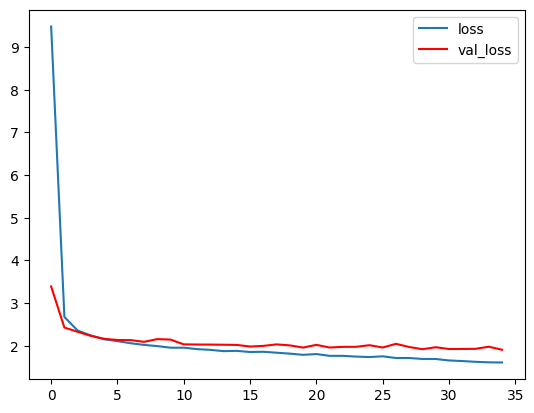

In [32]:
import matplotlib.pyplot as plt

plt.plot(history_1.history["loss"], label="loss")
plt.plot(history_1.history["val_loss"], c="red", label="val_loss")
plt.legend()

### 8 (c)

In [90]:
from functools import partial
DenseLayer = partial(tf.keras.layers.Dense, kernel_initializer="he_normal", activation="swish")


model_bn = tf.keras.Sequential([
    tf.keras.layers.Input((32, 32, 3)),
    tf.keras.layers.Flatten(),
])

for i in range(20):
  if i == 0:
    model_bn.add(DenseLayer(100))
  else:
    model_bn.add(tf.keras.layers.BatchNormalization())
    model_bn.add(DenseLayer(100))
model_bn.add(tf.keras.layers.BatchNormalization())
model_bn.add(tf.keras.layers.Dense(len(class_names), activation="sigmoid", kernel_initializer="he_normal"))

In [92]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.0001)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
early_stopping = tf.keras.callbacks.EarlyStopping(patience=15) # patience = number of epochs with no improvement after which training will be stopped.

model_bn.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [38]:
history_2 = model_bn.fit(X_train, y_train, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping], epochs=35)

Epoch 1/35
157/157 ━━━━━━━━━━━━━━━━━━━━ 39s 54ms/step - accuracy: 0.1002 - loss: 3.1058 - val_accuracy: 0.0942 - val_loss: 2.8349
Epoch 2/35
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.1021 - loss: 2.9034 - val_accuracy: 0.1020 - val_loss: 3.6905
Epoch 3/35
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.1216 - loss: 2.7232 - val_accuracy: 0.1006 - val_loss: 3.6466
Epoch 4/35
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1016 - loss: 2.6962 - val_accuracy: 0.1036 - val_loss: 3.7302
Epoch 5/35
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.1114 - loss: 2.6050 - val_accuracy: 0.1045 - val_loss: 3.2591
Epoch 6/35
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.1080 - loss: 2.5700 - val_accuracy: 0.1082 - val_loss: 3.1658
Epoch 7/35
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1056 - loss: 2.5569 - val_accuracy: 0.1121 - val_loss: 3.1257
Epoch 8/35
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.1081 - loss: 2.5403 - val_acc

In [45]:
import numpy as np

np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### 8 (d)

In [66]:
X_train[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [84]:
# Self-normalizing model
from functools import partial
DenseLayer = partial(tf.keras.layers.Dense, kernel_initializer="lecun_normal", activation="selu")

standardize_layer = tf.keras.layers.Rescaling(scale=1./255)

model_sn = tf.keras.Sequential([
    tf.keras.layers.Input((32, 32, 3)),
    standardize_layer,
    tf.keras.layers.Flatten()
])

for _ in range(20):
  model_sn.add(DenseLayer(100))
model_sn.add(tf.keras.layers.Dense(len(class_names), activation="sigmoid", kernel_initializer="he_normal"))

In [85]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,
                                    nesterov=True)
loss = tf.keras.losses.SparseCategoricalCrossentropy()

model_sn.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [86]:
history_3 = model_sn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=35)

Epoch 1/35
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.1323 - loss: 2.4137 - val_accuracy: 0.1260 - val_loss: 2.5935
Epoch 2/35
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.2219 - loss: 2.1058 - val_accuracy: 0.1766 - val_loss: 2.2506
Epoch 3/35
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.2650 - loss: 1.9620 - val_accuracy: 0.2437 - val_loss: 2.1631
Epoch 4/35
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2690 - loss: 1.9417 - val_accuracy: 0.2447 - val_loss: 2.0551
Epoch 5/35
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.3075 - loss: 1.8745 - val_accuracy: 0.2873 - val_loss: 1.9388
Epoch 6/35
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3242 - loss: 1.8112 - val_accuracy: 0.2951 - val_loss: 1.9693
Epoch 7/35
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3500 - loss: 1.7735 - val_accuracy: 0.3184 - val_loss: 1.8672
Epoch 8/35
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.3770 - loss: 1.7442 - val_accu

### 8 (e)

In [110]:
# Self normalization model with alpha dropout
from functools import partial
DenseLayer = partial(tf.keras.layers.Dense, kernel_initializer="lecun_normal", activation="selu")

standardize_layer = tf.keras.layers.Rescaling(scale=1./255)

model_d = tf.keras.Sequential([
    tf.keras.layers.Input((32, 32, 3)),
    standardize_layer,
    tf.keras.layers.Flatten()
])

for _ in range(20):
  model_d.add(tf.keras.layers.AlphaDropout(rate=0.2))
  model_d.add(DenseLayer(100))
model_d.add(tf.keras.layers.AlphaDropout(rate=0.2))
model_d.add(tf.keras.layers.Dense(len(class_names), activation="sigmoid", kernel_initializer="he_normal"))

In [106]:
model_d.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_7 (Rescaling)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_21 (AlphaDropout) │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_276 (Dense)               │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_22 (AlphaDropout) │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_277 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_23 (AlphaDropout) │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_278 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_24 (AlphaDropout) │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_279 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_25 (AlphaDropout) │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_280 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_26 (AlphaDropout) │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_281 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_27 (AlphaDropout) │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_282 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_28 (AlphaDropout) │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_283 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_29 (AlphaDropout) │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_284 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_30 (AlphaDropout) │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_285 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_31 (AlphaDropout) │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_286 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_32 (AlphaDropout) │ (None, 100)            │             

 Total params: 500,210 (1.91 MB)

 Trainable params: 500,210 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

In [118]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.0001)
loss = tf.keras.losses.SparseCategoricalCrossentropy()

model_d.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [119]:
history_4 = model_d.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15)

Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.1011 - loss: 4.4162 - val_accuracy: 0.1105 - val_loss: 3.4472
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0997 - loss: 2.9872 - val_accuracy: 0.0993 - val_loss: 2.6279
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1073 - loss: 2.8846 - val_accuracy: 0.1067 - val_loss: 2.4417
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1002 - loss: 2.8619 - val_accuracy: 0.1087 - val_loss: 2.5129
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.0961 - loss: 2.7938 - val_accuracy: 0.0993 - val_loss: 2.7357
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.0957 - loss: 2.6959 - val_accuracy: 0.1017 - val_loss: 2.7973
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.1064 - loss: 2.6347 - val_accuracy: 0.0958 - val_loss: 2.8342
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1043 - loss: 2.5989 - val_acc

In [213]:
# Use MC Dropout without retraining the model
model_d_clone = tf.keras.models.clone_model(model_d) # clone_model() clones only architecture, not the weights!
model_d_clone.set_weights(model_d.get_weights()) # use set_weights() to set weights as well

In [214]:
# Monte Carlo Dropout
class MCDropout(tf.keras.layers.Dropout):
  def call(self, inputs, training=False):
    return super().call(inputs, training=True)

In [215]:
# Self normalization model with alpha dropout
from functools import partial
DenseLayer = partial(tf.keras.layers.Dense, kernel_initializer="lecun_normal", activation="selu")

standardize_layer = tf.keras.layers.Rescaling(scale=1./255)

model_d_MC = tf.keras.Sequential([
    tf.keras.layers.Input((32, 32, 3)),
    standardize_layer,
    tf.keras.layers.Flatten()
])

for _ in range(20):
  model_d_MC.add(MCDropout(rate=0.2))
  model_d_MC.add(DenseLayer(100))
model_d_MC.add(MCDropout(rate=0.2))
model_d_MC.add(tf.keras.layers.Dense(len(class_names), activation="sigmoid", kernel_initializer="he_normal"))

In [216]:
# Set the weights from previous model
for i in range(3, 43, 2):
  model_d_MC.layers[i].set_weights(model_d_clone.layers[i].get_weights())

In [217]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.0001)
loss = tf.keras.losses.SparseCategoricalCrossentropy()

model_d_MC.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [218]:
history_5 = model_d_MC.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15)

Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 52s 204ms/step - accuracy: 0.0933 - loss: 5.5050 - val_accuracy: 0.0993 - val_loss: 3.3999
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.1080 - loss: 3.2187 - val_accuracy: 0.1014 - val_loss: 3.0433
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.0968 - loss: 3.0625 - val_accuracy: 0.1027 - val_loss: 2.9688
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.1011 - loss: 2.9331 - val_accuracy: 0.0997 - val_loss: 2.9263
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.0928 - loss: 2.9486 - val_accuracy: 0.0973 - val_loss: 2.8996
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.1000 - loss: 2.8912 - val_accuracy: 0.1008 - val_loss: 2.8566
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.0950 - loss: 2.8452 - val_accuracy: 0.1015 - val_loss: 2.8288
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.0930 - loss: 2.8326 - val_a

### 8 (f)

In [232]:
# 1cycle implementation (generated with ChatGPT)
from tensorflow.keras.callbacks import Callback
import math

class OneCycleScheduler(Callback):
    def __init__(self, max_lr, steps, pct_start=0.3, div_factor=25.0, final_div_factor=1e4):
        super().__init__()
        self.max_lr = max_lr
        self.total_steps = steps
        self.pct_start = pct_start
        self.div_factor = div_factor
        self.final_div_factor = final_div_factor
        self.initial_lr = max_lr / div_factor
        self.final_lr = max_lr / final_div_factor

    def on_train_begin(self, logs=None):
        self.step = 0

    def on_batch_begin(self, batch, logs=None):
        pct = self.step / self.total_steps
        if pct < self.pct_start:
            scale = pct / self.pct_start
            learning_rate = self.initial_lr + scale * (self.max_lr - self.initial_lr)
        else:
            scale = (pct - self.pct_start) / (1 - self.pct_start)
            learning_rate = self.max_lr - scale * (self.max_lr - self.final_lr)

        self.model.optimizer.learning_rate.assign(learning_rate)
        self.step += 1

In [233]:
# Usage (generated with ChatGPT)
steps_per_epoch = len(X_train)
epochs = 10
total_steps = steps_per_epoch * epochs

onecycle = OneCycleScheduler(max_lr=1e-3, steps=total_steps)

model_d_MC.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, callbacks=[onecycle])

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.0965 - loss: 2.6951 - val_accuracy: 0.0971 - val_loss: 2.6731
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.0947 - loss: 2.6615 - val_accuracy: 0.1031 - val_loss: 2.6736
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.1012 - loss: 2.6779 - val_accuracy: 0.1037 - val_loss: 2.6551
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.1028 - loss: 2.6078 - val_accuracy: 0.0988 - val_loss: 2.6449
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.1013 - loss: 2.6495 - val_accuracy: 0.1035 - val_loss: 2.6202
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.1017 - loss: 2.6193 - val_accuracy: 0.0960 - val_loss: 2.6143
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.1003 - loss: 2.6006 - val_accuracy: 0.0981 - val_loss: 2.5956
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1053 - loss: 2.5779 - val_accu